In [1]:
#Mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#Set repo path and check repo status

repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status

Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [2]:
#Initialize environment, load modules/libraries

import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras

#Import python code from seperate files

sys.path.append('../')
from geomgen.helpers import show_grid_image

In [3]:
#Load images and labels from file (10000 images)
#The midpoints of the shapes on the images are now fluctuating

loaded  = np.load('../data/shapes_31_fluct.npz')
test_images = loaded['images']
test_labels = loaded['labels'][:,0].astype(int)-2

n_test = len(test_labels)
x_test = test_images/255
y_test = test_labels

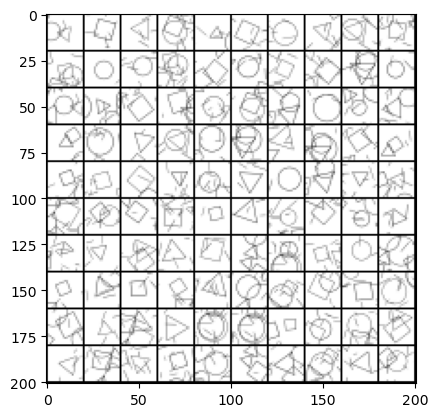

In [4]:
#Show a few images

grid = (10,10)
grid_pos = show_grid_image(test_images, grid,'../data/tmp_details.png')

In [6]:
#Compute model accuracy

model = keras.models.load_model('../data/neural_m3')
test_acc= model.evaluate(x_test, y_test, batch_size=128)
print("test accuracy : %.3f" % (test_acc[1]))

79/79 [==============================] - 1s 6ms/step - loss: 3.3236 - accuracy: 0.4695
test accuracy : 0.470


79/79 [==============================] - 1s 5ms/step

position : target -> fail : [circle, triangle, square]
(0, 0) : 2 -> 1 : [0.    0.992 0.008]
(0, 1) : 2 -> 1 : [0.014 0.677 0.31 ]
(0, 2) : 0 -> 2 : [0.312 0.001 0.687]
(0, 3) : 2 -> 1 : [0.    0.948 0.052]
(0, 4) : 2 -> 1 : [0.    0.983 0.017]
(1, 0) : 0 -> 1 : [0.001 0.986 0.013]
(1, 1) : 0 -> 1 : [0. 1. 0.]
(1, 2) : 0 -> 1 : [0. 1. 0.]
(1, 3) : 2 -> 1 : [0.027 0.955 0.018]
(1, 4) : 0 -> 2 : [0.016 0.137 0.848]
(2, 0) : 2 -> 1 : [0.    0.993 0.007]
(2, 1) : 0 -> 2 : [0.002 0.001 0.997]
(2, 2) : 2 -> 1 : [0.002 0.978 0.02 ]
(2, 3) : 2 -> 1 : [0.001 0.991 0.008]
(2, 4) : 0 -> 2 : [0.059 0.001 0.941]
(3, 0) : 2 -> 1 : [0.    0.998 0.002]
(3, 1) : 0 -> 1 : [0. 1. 0.]
(3, 2) : 0 -> 2 : [0.    0.034 0.966]
(3, 3) : 0 -> 1 : [0.    0.999 0.001]
(3, 4) : 0 -> 2 : [0.002 0.    0.998]


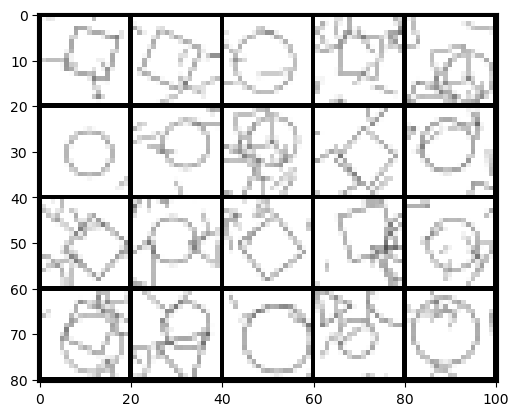

In [7]:
#Show a few images and labels where model prediction failed

pred = model.predict(x_test, batch_size=128)
pred_labels = np.argmax(pred,1)

fail = np.not_equal(pred_labels,test_labels)
fail_images = test_images[fail]
target_labels = test_labels[fail]
fail_labels = pred_labels[fail]
fail_pred = pred[fail]

grid = (4,5)
grid_pos = show_grid_image(fail_images, grid, '../data/tmp_fails.png')

print("\nposition : target -> fail : [circle, triangle, square]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[1]*grid[0]):
    print(f"{grid_pos[i]} : {target_labels[i]} -> {fail_labels[i]} : {fail_pred[i]}")